#### Setup
1. go to https://github.com/CSSEGISandData/COVID-19
2. git clone John Hopkins data repository into your Documents folder (only works for Windows, make necessary adjustments if you're on Mac)

In [1]:
# setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycountry_convert as pc
import os
import getpass
import subprocess
from datetime import datetime
user = getpass.getuser()
os.chdir("C:/Users/"+user+"/Documents/git/COVID-19")

top_no_countries = 10

In [2]:
# data pulling and date setting
output = subprocess.check_output(["git", "pull"])
cases_data  = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_data = pd.read_csv("csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
last_day = cases_data.columns[-1]
week_ago = cases_data.columns[-8]
days_available = cases_data.columns[4:].tolist()
print(last_day)

4/5/20


In [13]:
# adding continent information to the data
missing_countries = {
    "Congo (Brazzaville)": "AF",
    "Congo (Kinshasa)": "AF",
    "Cote d'Ivoire": "AF",
    "Diamond Princess": "AS",
    "Holy See": "AS",
    "Korea, South": "AS",
    "Taiwan*": "AS",
    "Timor-Leste": "AS",
    "West Bank and Gaza": "AS",
    "Kosovo": "EU",
    "Burma": "AS",
    "MS Zaandam": "NA",
    "US": "NA",
    "Western Sahara": "AF"}

continent_names = {
    'EU': 'Europe',
    'NA': 'North America',
    'AS': 'Asia',
    'SA': 'South America',
    'AF': 'Africa',
    'OC': 'Australia and Oceania'
}

def country_to_continent(country):
    if country in missing_countries:
        return continent_names[missing_countries[country]]
    else:
        try:
            return continent_names[pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))]
        except:
            print(country)
            return "XX"

cases_data['continent']  = cases_data.apply(lambda x: country_to_continent(x['Country/Region']), axis=1)
deaths_data['continent'] = deaths_data.apply(lambda x: country_to_continent(x['Country/Region']), axis=1)

In [14]:
# continents - cases
continent_cases = cases_data[['continent', week_ago, last_day]]
continent_cases = continent_cases.groupby(['continent']).agg({week_ago: 'sum', last_day: 'sum'})
continent_cases['perc_increase'] = continent_cases.apply(lambda x: x[last_day] / x[week_ago] - 1, axis=1)
continent_cases['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_cases['perc_increase']], index = continent_cases.index)
continent_cases['perc_of_global'] = continent_cases.apply(lambda x: x[last_day] / sum(cases_data[last_day]), axis=1)
continent_cases['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_cases['perc_of_global']], index = continent_cases.index)
continent_cases.sort_values(by=[last_day], ascending=False, inplace=True)

In [15]:
# continents - deaths
continent_deaths = deaths_data[['continent', week_ago, last_day]]
continent_deaths = continent_deaths.groupby(['continent']).agg({week_ago: 'sum', last_day: 'sum'})
continent_deaths['perc_increase'] = continent_deaths.apply(lambda x: x[last_day] / x[week_ago] - 1, axis=1)
continent_deaths['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_deaths['perc_increase']], index = continent_deaths.index)
continent_deaths['perc_of_global'] = continent_deaths.apply(lambda x: x[last_day] / sum(deaths_data[last_day]), axis=1)
continent_deaths['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in continent_deaths['perc_of_global']], index = continent_deaths.index)
continent_deaths.sort_values(by=[last_day], ascending=False, inplace=True)

In [16]:
# countries - cases
countries_cases = cases_data[['Country/Region', week_ago, last_day]]
countries_cases = countries_cases.groupby(['Country/Region']).agg({week_ago: 'sum', last_day: 'sum'})
countries_cases['perc_increase'] = countries_cases.apply(lambda x: x[last_day] / x[week_ago] - 1 if x[week_ago] != 0 else 0, axis=1)
countries_cases['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_cases['perc_increase']], index = countries_cases.index)
countries_cases['perc_of_global'] = countries_cases.apply(lambda x: x[last_day] / sum(cases_data[last_day]), axis=1)
countries_cases['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_cases['perc_of_global']], index = countries_cases.index)
countries_cases.sort_values(by=[last_day], ascending=False, inplace=True)

In [17]:
top_countries = list(countries_cases.head(top_no_countries).index)

In [18]:
# countries - deaths
countries_deaths = deaths_data[['Country/Region', week_ago, last_day]]
countries_deaths = countries_deaths.groupby(['Country/Region']).agg({week_ago: 'sum', last_day: 'sum'})
countries_deaths['perc_increase'] = countries_deaths.apply(lambda x: x[last_day] / x[week_ago] - 1 if x[week_ago] != 0 else 0, axis=1)
countries_deaths['perc_increase'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_deaths['perc_increase']], index = countries_deaths.index)
countries_deaths['perc_of_global'] = countries_deaths.apply(lambda x: x[last_day] / sum(deaths_data[last_day]), axis=1)
countries_deaths['perc_of_global'] = pd.Series(["{0:.2f}%".format(val * 100) for val in countries_deaths['perc_of_global']], index = countries_deaths.index)
countries_deaths.sort_values(by=[last_day], ascending=False, inplace=True)

                       3/29/20  4/5/20 perc_increase perc_of_global
continent                                                          
Europe                  385638  647049        67.79%         50.86%
North America           150611  359788       138.89%         28.28%
Asia                    163381  223919        37.05%         17.60%
South America            11197   25318       126.11%          1.99%
Africa                    4786    9302        94.36%          0.73%
Australia and Oceania     4504    6739        49.62%          0.53%


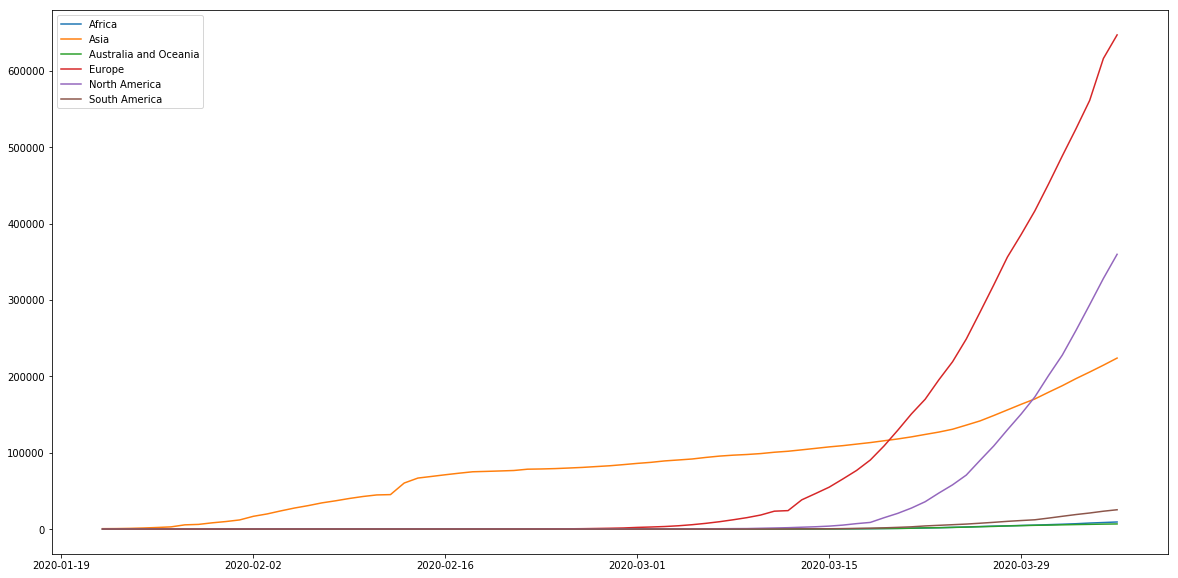

In [19]:
# continent cases - graph
plt.rcParams["figure.figsize"] = (20,10)
continent_cases_graph = cases_data[['continent',] + days_available]
continent_cases_graph = pd.melt(continent_cases_graph, id_vars=["continent"], value_vars = days_available, var_name = 'day', value_name = 'cases')
continent_cases_graph['day'] = continent_cases_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
continent_cases_graph.reset_index(inplace=True)
continent_cases_graph = pd.pivot_table(continent_cases_graph, values=['cases'], columns=['continent'], index=['day'], aggfunc={'cases': np.sum})
for continent in list(continent_cases_graph.columns.levels[1]):
    plt.plot(continent_cases_graph.index, continent_cases_graph['cases'][continent])
plt.legend()
print(continent_cases)

                       3/29/20  4/5/20 perc_increase perc_of_global
continent                                                          
Europe                   24205   49241       103.43%         70.98%
North America             2617   10141       287.50%         14.62%
Asia                      6678    8620        29.08%         12.43%
South America              256     892       248.44%          1.29%
Africa                     152     444       192.11%          0.64%
Australia and Oceania       17      36       111.76%          0.05%


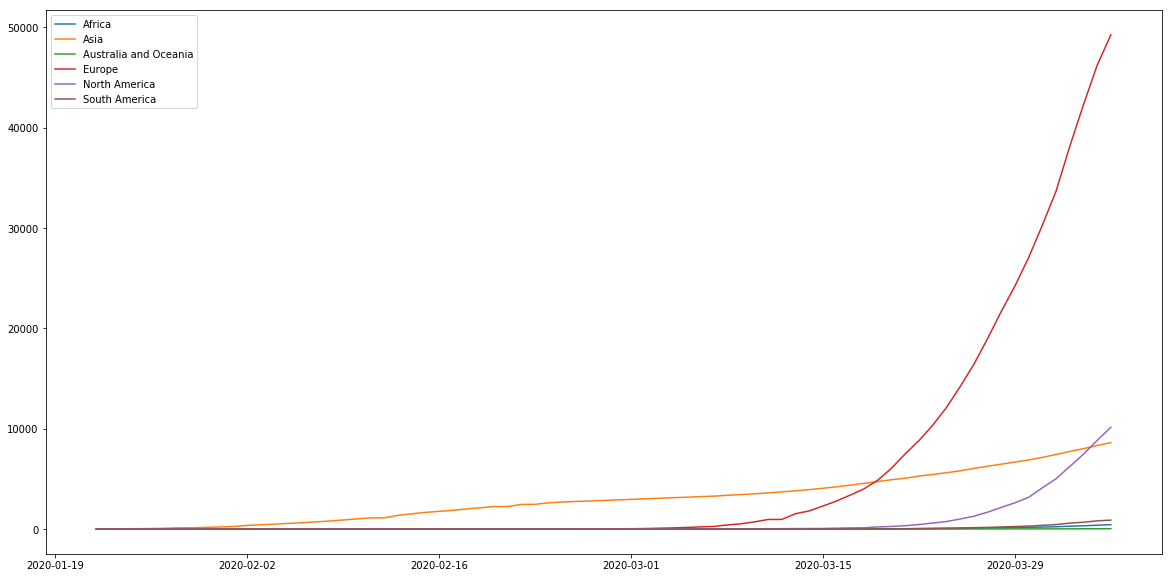

In [20]:
# continent deaths - graph
plt.rcParams["figure.figsize"] = (20,10)
continent_deaths_graph = deaths_data[['continent',] + days_available]
continent_deaths_graph = pd.melt(continent_deaths_graph, id_vars=["continent"], value_vars = days_available, var_name = 'day', value_name = 'cases')
continent_deaths_graph['day'] = continent_deaths_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
continent_deaths_graph.reset_index(inplace=True)
continent_deaths_graph = pd.pivot_table(continent_deaths_graph, values=['cases'], columns=['continent'], index=['day'], aggfunc={'cases': np.sum})
for continent in list(continent_deaths_graph.columns.levels[1]):
    plt.plot(continent_deaths_graph.index, continent_deaths_graph['cases'][continent])
plt.legend()
print(continent_deaths)

                3/29/20  4/5/20 perc_increase perc_of_global
Country/Region                                              
US               140886  337072       139.25%         26.50%
Spain             80110  131646        64.33%         10.35%
Italy             97689  128948        32.00%         10.14%
Germany           62095  100123        61.24%          7.87%
France            40708   93773       130.36%          7.37%
China             82122   82602         0.58%          6.49%
Iran              38309   58226        51.99%          4.58%
United Kingdom    19780   48436       144.87%          3.81%
Turkey             9217   27069       193.69%          2.13%
Switzerland       14829   21100        42.29%          1.66%


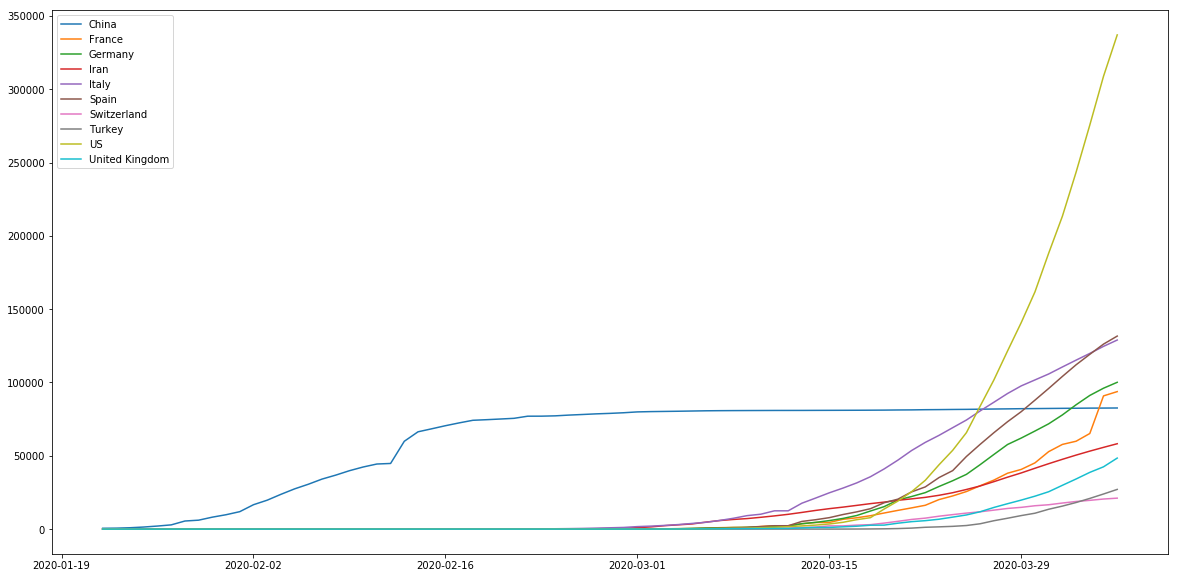

In [21]:
# country cases - graph
plt.rcParams["figure.figsize"] = (20,10)
country_cases_graph = cases_data[cases_data['Country/Region'].isin(top_countries)][['Country/Region',] + days_available]
country_cases_graph = pd.melt(country_cases_graph, id_vars=["Country/Region"], value_vars = days_available, var_name = 'day', value_name = 'cases')
country_cases_graph['day'] = country_cases_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
country_cases_graph.reset_index(inplace=True)
country_cases_graph = pd.pivot_table(country_cases_graph, values=['cases'], columns=['Country/Region'], index=['day'], aggfunc={'cases': np.sum})
for country in list(country_cases_graph.columns.levels[1]):
    plt.plot(country_cases_graph.index, country_cases_graph['cases'][country])
plt.legend()
print(countries_cases.head(top_no_countries))

                3/29/20  4/5/20 perc_increase perc_of_global
Country/Region                                              
Italy             10779   15887        47.39%         22.90%
Spain              6803   12641        85.82%         18.22%
US                 2467    9619       289.91%         13.87%
France             2611    8093       209.96%         11.67%
United Kingdom     1231    4943       301.54%          7.13%
Iran               2640    3603        36.48%          5.19%
China              3304    3333         0.88%          4.80%
Netherlands         772    1771       129.40%          2.55%
Germany             533    1584       197.19%          2.28%
Belgium             431    1447       235.73%          2.09%


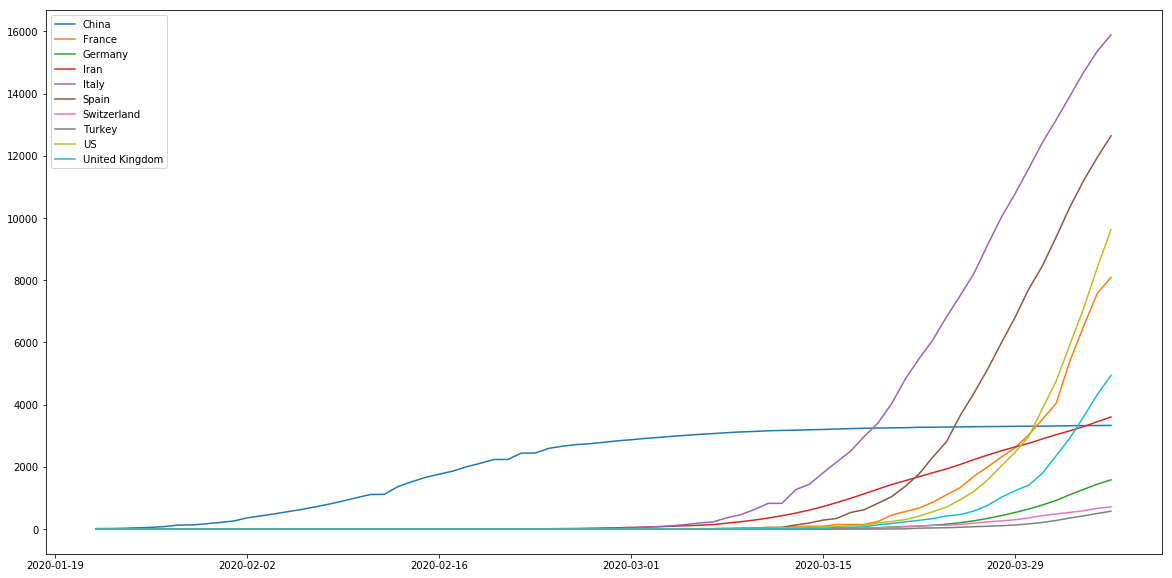

In [22]:
# country deaths - graph
plt.rcParams["figure.figsize"] = (20,10)
country_deaths_graph = deaths_data[cases_data['Country/Region'].isin(top_countries)][['Country/Region',] + days_available]
country_deaths_graph = pd.melt(country_deaths_graph, id_vars=["Country/Region"], value_vars = days_available, var_name = 'day', value_name = 'cases')
country_deaths_graph['day'] = country_deaths_graph.apply(lambda x: datetime.strptime(x['day'], '%m/%d/%y'), axis=1)
country_deaths_graph.reset_index(inplace=True)
country_deaths_graph = pd.pivot_table(country_deaths_graph, values=['cases'], columns=['Country/Region'], index=['day'], aggfunc={'cases': np.sum})
for country in list(country_deaths_graph.columns.levels[1]):
    plt.plot(country_deaths_graph.index, country_deaths_graph['cases'][country])
plt.legend()
print(countries_deaths.head(top_no_countries))